<a href="https://colab.research.google.com/github/taru4u3/NeuralNetzwerk/blob/main/check_credit_staus_fullypaid_chargedoff_real_praxis_feature_engineering_heavy_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Download first csv which contains column names with description

In [53]:
data_info = pd.read_csv('./lending_club_info.csv',index_col='LoanStatNew')
#index_col : int or sequence, default 0
#defines which Column to use for index.

In [54]:
data_info.head()

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade


In [55]:
print(data_info.loc['term']['Description'])

The number of payments on the loan. Values are in months and can be either 36 or 60.


Define a function, that is handy to read description of any column

In [56]:
def feature_info(col_name):
  print(data_info.loc[col_name]['Description'])

In [57]:
feature_info('grade')

LC assigned loan grade


Download second csv containing the column data

In [58]:
df = pd.read_csv('./lending_club_loan_two.csv')

In [59]:
df.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216904 entries, 0 to 216903
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             216904 non-null  float64
 1   term                  216904 non-null  object 
 2   int_rate              216904 non-null  float64
 3   installment           216904 non-null  float64
 4   grade                 216904 non-null  object 
 5   sub_grade             216904 non-null  object 
 6   emp_title             204376 non-null  object 
 7   emp_length            206863 non-null  object 
 8   home_ownership        216904 non-null  object 
 9   annual_inc            216904 non-null  float64
 10  verification_status   216904 non-null  object 
 11  issue_d               216904 non-null  object 
 12  loan_status           216904 non-null  object 
 13  purpose               216904 non-null  object 
 14  title                 215938 non-null  object 
 15  

<Axes: xlabel='loan_status', ylabel='count'>

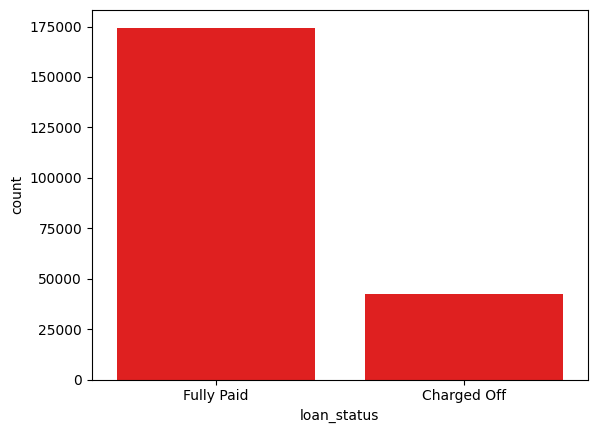

In [61]:
sns.countplot(x=df['loan_status'], color='r')

Make loan_status as numeric feature so that we can use it to check its correlation with other features

In [62]:
df['loan_repaid' ] = df['loan_status'].apply(lambda x : 0 if x=="Fully Paid" else 1)

In [63]:
df['loan_repaid' ].value_counts()

0    174475
1     42429
Name: loan_repaid, dtype: int64

In [64]:
df.corr()['loan_repaid'].sort_values(ascending=False)

<ipython-input-64-9939242440e5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['loan_repaid'].sort_values(ascending=False)


loan_repaid             1.000000
int_rate                0.245690
dti                     0.132428
revol_util              0.081794
loan_amnt               0.060325
installment             0.041064
open_acc                0.027014
pub_rec                 0.018516
pub_rec_bankruptcies    0.008079
revol_bal              -0.011759
total_acc              -0.017454
annual_inc             -0.054471
mort_acc               -0.073719
Name: loan_repaid, dtype: float64

<ipython-input-65-df002da5e9a7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['loan_amnt'])


<Axes: xlabel='loan_amnt', ylabel='Density'>

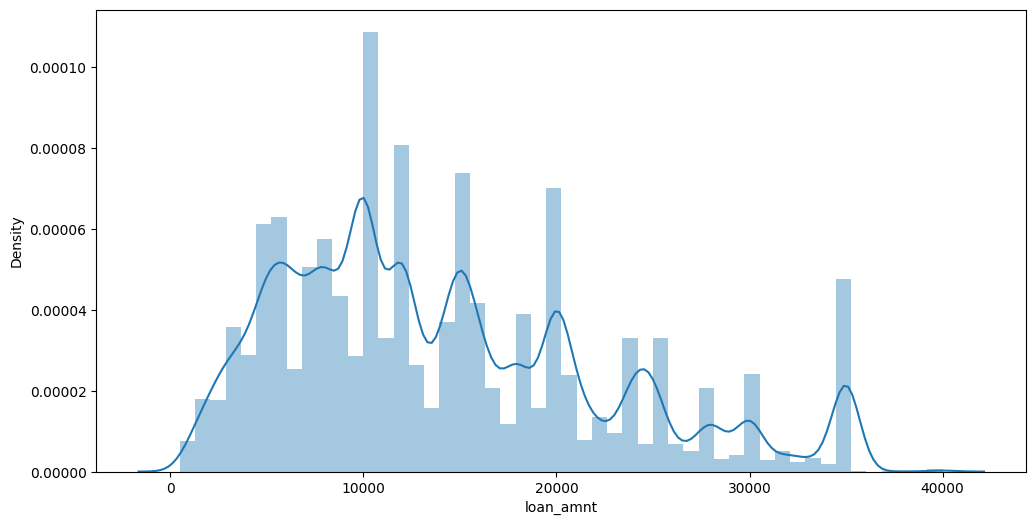

In [65]:
# Next let us check how loan_amount is distributed
plt.figure(figsize=(12,6))
sns.distplot(df['loan_amnt'])

<Axes: xlabel='loan_amnt', ylabel='installment'>

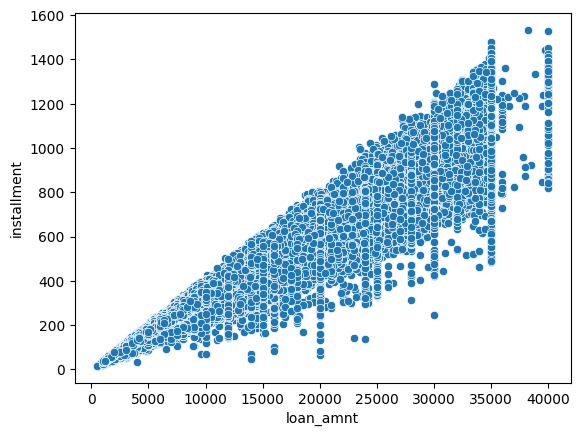

In [66]:
# Next let us check if loan_amount increases do installments increases
sns.scatterplot(x='loan_amnt',y='installment',data=df)

<Axes: xlabel='loan_status', ylabel='int_rate'>

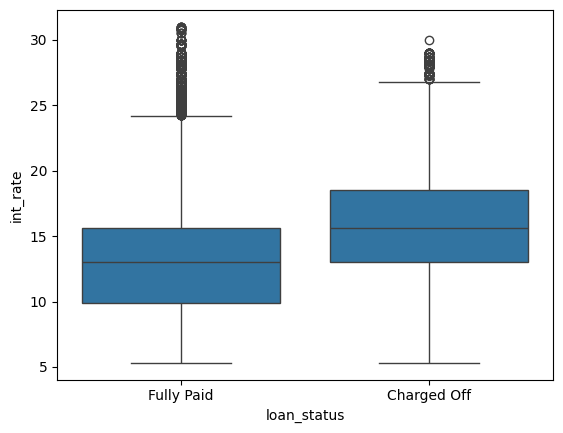

In [67]:
# As we see interest rate is highly coorelated with loan status so lets see
sns.boxplot(x='loan_status',y='int_rate',data=df)
# indeed, interest_rate has an impact on loan_status, ppl with lower interest rate have paid compared to ppl with higher interest rate

In [68]:
feature_info('revol_util')

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [69]:
print(feature_info('dti'))

A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
None


<Axes: xlabel='loan_status', ylabel='loan_amnt'>

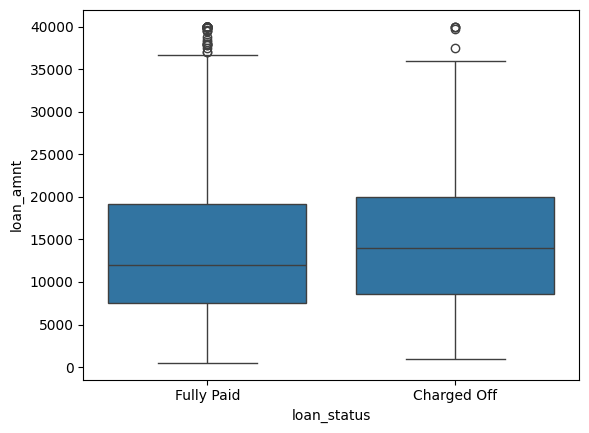

In [70]:
# Let us see if loan_amnt plays a role in determining loan_status
sns.boxplot(x='loan_status',y='loan_amnt',data=df)
# doesnt look like loan was fullypaid if loan amount was low or high, it has no significant impact

AUFGABE: Berechne die zusammengefassten Statistiken für die Höhe des Kredites, gruppiert nach loan_status.

In [71]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,42429.0,15115.851776,8478.776643,1000.0,8600.0,14000.0,20000.0,40000.0
Fully Paid,174475.0,13846.250466,8297.450398,500.0,7500.0,12000.0,19200.0,40000.0


# Part 2: Data Preprocessing
Now let us focus on feature engineering

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216904 entries, 0 to 216903
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             216904 non-null  float64
 1   term                  216904 non-null  object 
 2   int_rate              216904 non-null  float64
 3   installment           216904 non-null  float64
 4   grade                 216904 non-null  object 
 5   sub_grade             216904 non-null  object 
 6   emp_title             204376 non-null  object 
 7   emp_length            206863 non-null  object 
 8   home_ownership        216904 non-null  object 
 9   annual_inc            216904 non-null  float64
 10  verification_status   216904 non-null  object 
 11  issue_d               216904 non-null  object 
 12  loan_status           216904 non-null  object 
 13  purpose               216904 non-null  object 
 14  title                 215938 non-null  object 
 15  

In [73]:
# Let us dig into object data types

In [74]:
df['term'].value_counts()

 36 months    165398
 60 months     51506
Name: term, dtype: int64

Extract the numeric month so 36 and 60 but note there is a problem in this data there is empty space in the beginning hence extract not 2 but first 3 chars and convert them into int

In [75]:
df['term'] = df['term'].apply(lambda s: int(s[:3]))

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216904 entries, 0 to 216903
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             216904 non-null  float64
 1   term                  216904 non-null  int64  
 2   int_rate              216904 non-null  float64
 3   installment           216904 non-null  float64
 4   grade                 216904 non-null  object 
 5   sub_grade             216904 non-null  object 
 6   emp_title             204376 non-null  object 
 7   emp_length            206863 non-null  object 
 8   home_ownership        216904 non-null  object 
 9   annual_inc            216904 non-null  float64
 10  verification_status   216904 non-null  object 
 11  issue_d               216904 non-null  object 
 12  loan_status           216904 non-null  object 
 13  purpose               216904 non-null  object 
 14  title                 215938 non-null  object 
 15  

<Axes: xlabel='grade', ylabel='count'>

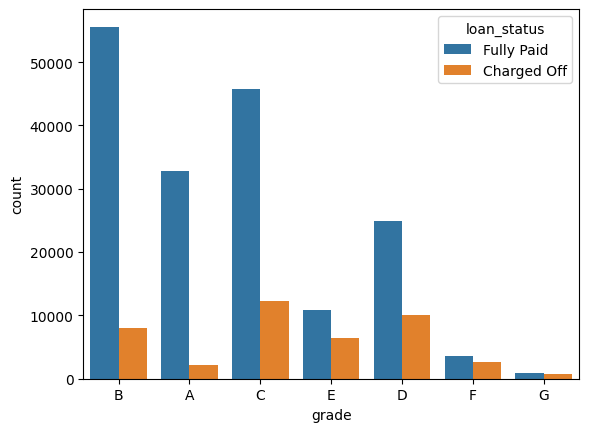

In [77]:
sns.countplot(x=df['grade'].sort_values(),hue=df['loan_status'])
# it looks like the class F and G has not paid off loan often

<Axes: xlabel='sub_grade', ylabel='count'>

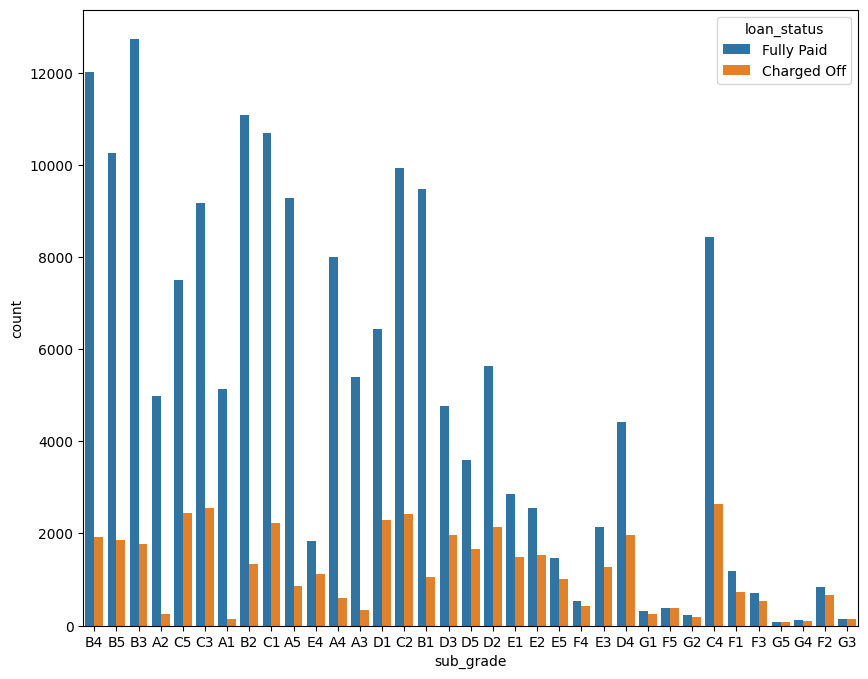

In [78]:
plt.figure(figsize = (10,8))
sns.countplot(x=df['sub_grade'].sort_values(),hue=df['loan_status'])

Grade is incorporated in subgrade in great detail, so let us remove grade and convert subgrade using one hot encoding

In [79]:
df.drop('grade',axis=1,inplace=True)

In [80]:
# one hot encoding
sub_grade = pd.get_dummies(df['sub_grade' ], drop_first=True)

In [81]:
df = pd.concat([df, sub_grade], axis=1)

In [82]:
df.drop('sub_grade',axis=1,inplace=True)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216904 entries, 0 to 216903
Data columns (total 60 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             216904 non-null  float64
 1   term                  216904 non-null  int64  
 2   int_rate              216904 non-null  float64
 3   installment           216904 non-null  float64
 4   emp_title             204376 non-null  object 
 5   emp_length            206863 non-null  object 
 6   home_ownership        216904 non-null  object 
 7   annual_inc            216904 non-null  float64
 8   verification_status   216904 non-null  object 
 9   issue_d               216904 non-null  object 
 10  loan_status           216904 non-null  object 
 11  purpose               216904 non-null  object 
 12  title                 215938 non-null  object 
 13  dti                   216904 non-null  float64
 14  earliest_cr_line      216904 non-null  object 
 15  

# Deal with null values and other object types

In [84]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
emp_title               12528
emp_length              10041
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                     966
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                152
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                20767
pub_rec_bankruptcies      302
address                     1
loan_repaid                 0
A2                          0
A3                          0
A4                          0
A5                          0
B1                          0
B2                          0
B3                          0
B4        

In [85]:
  df['emp_title'].value_counts()
  # Looks like there are too many titles and we cannot fill it for null values + we assume they dont play a role in determining loan status we drop it

Teacher                            2393
Manager                            2369
Registered Nurse                   1045
Supervisor                         1019
RN                                  977
                                   ... 
branch manager IIII                   1
Heb                                   1
MasterCard                            1
Phelps Memorial Hospital Center       1
General Motors Corporation            1
Name: emp_title, Length: 103777, dtype: int64

In [86]:
df.drop('emp_title',axis=1, inplace=True)

<Axes: xlabel='emp_length', ylabel='count'>

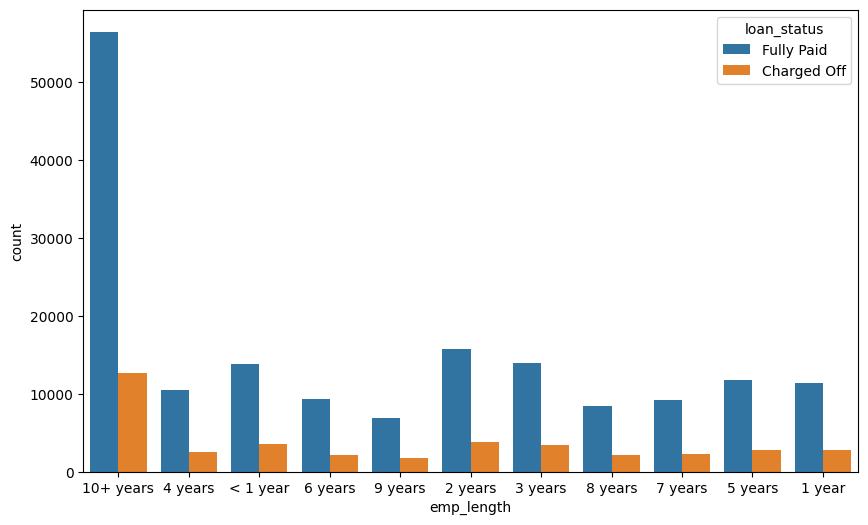

In [87]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['emp_length'],hue=df['loan_status'])

CHALLENGE: This still gives us insufficient information as to whether there is a strong relationship between length of employment and repayment, we need the percentage of repayment per category. This means we know what percentage of borrowers per job category have not repaid their loan. There are a variety of ways to create this series. After you have created it, display it as a barplot. This might be difficult, take a look at the solution notebook for problems with creating the series.

In [88]:
#(df.groupby('emp_length')['loan_repaid'].count()) / len(df[df['loan_repaid']==1 ])
emp_fp = df[df['loan_status']=='Fully Paid'].groupby("emp_length").count()['loan_status']

In [89]:
emp_co = df[df['loan_status']=='Charged Off'].groupby("emp_length").count()['loan_status']

In [90]:
emp_len = df.groupby("emp_length")['loan_status'].count()

In [91]:
emp_len = emp_co / emp_fp

<Axes: xlabel='emp_length'>

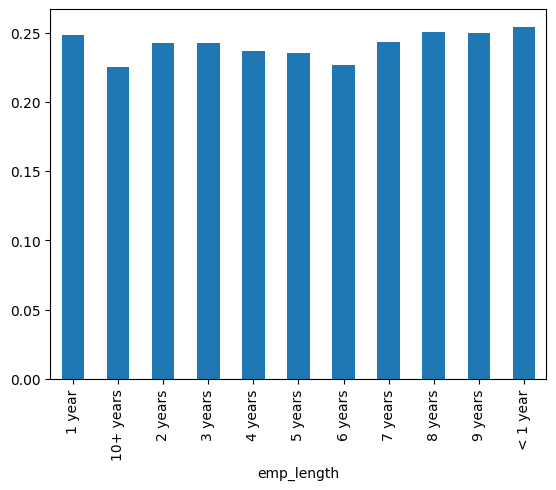

In [92]:
emp_len.plot(kind = 'bar')

Conclusion : The repayment rates across all categories are extremely similar. Discard the emp_length column

In [93]:
df.drop('emp_length',axis=1, inplace = True)

In [94]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                     966
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                152
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                20767
pub_rec_bankruptcies      302
address                     1
loan_repaid                 0
A2                          0
A3                          0
A4                          0
A5                          0
B1                          0
B2                          0
B3                          0
B4                          0
B5                          0
C1        

Let us now check the columns title and purpose

In [95]:
df['title' ].value_counts()

Debt consolidation                 83411
Credit card refinancing            28203
Home improvement                    8348
Other                               7125
Debt Consolidation                  6410
                                   ...  
No more CC debt                        1
Much needed repairs                    1
Lower APR - Less Interest Paid!        1
Unexpected bills                       1
Credit Card/Home Improvement           1
Name: title, Length: 29204, dtype: int64

In [96]:
df['purpose' ].value_counts()

debt_consolidation    128317
credit_card            45514
home_improvement       13135
other                  11636
major_purchase          4933
small_business          3071
car                     2559
medical                 2301
moving                  1554
vacation                1347
house                   1204
wedding                 1014
renewable_energy         182
educational              137
Name: purpose, dtype: int64

Conclusion : Title and purpose are similar, so discard title

In [97]:
df.drop('title',axis=1,inplace=True)

Let us focus on mort_acc missing values. Let us check which which column is mort_acc highly coorelated

In [98]:
df.corr()['mort_acc'].sort_values(ascending=False)

<ipython-input-98-c591a4eea948>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['mort_acc'].sort_values(ascending=False)


mort_acc                1.000000
total_acc               0.380661
annual_inc              0.245589
loan_amnt               0.221990
revol_bal               0.194859
installment             0.192968
open_acc                0.109753
term                    0.096645
A3                      0.037468
A2                      0.036073
A5                      0.035269
pub_rec_bankruptcies    0.029010
A4                      0.028691
B1                      0.022757
B2                      0.016255
pub_rec                 0.014746
revol_util              0.006998
G4                     -0.000929
B3                     -0.000937
G1                     -0.001008
G3                     -0.002014
B4                     -0.002152
F1                     -0.002351
C5                     -0.003454
G5                     -0.003854
G2                     -0.004056
F5                     -0.004463
E1                     -0.005008
F2                     -0.005246
F4                     -0.005496
E4        

HERAUSFORDERUNG: Lasst uns die fehlenden Werte von mort_acc basierend auf deren total_acc-Werten ersetzen. Wenn mort_acc fehlt, ersetzen wir den fehlenden Wert mit dem Durchschnitt entsprechend des total_acc-Wertes aus der oben erzeugten Series. Dies beinhaltet die Anwendung der .apply()-Methode mit zwei Spalten. Beachte den folgenden Link für mehr Informationen, oder wirf einen Blick in das Video/Lösungsnotebook.

In [99]:
print("Mean of mort_acc column per total_acc")
df.groupby('total_acc')['mort_acc'].mean()

Mean of mort_acc column per total_acc


total_acc
2.0      0.000000
3.0      0.064516
4.0      0.069717
5.0      0.086124
6.0      0.145768
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 115, dtype: float64

In [100]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.

    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [101]:
total_acc_avg = df.groupby('total_acc')['mort_acc'].mean()

In [102]:
#df['mort_acc' ] = df.apply(lambda x : fill_mort_acc(x['total_acc'], x['mort_acc' ]),axis=1 )
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [103]:
df.isnull().sum() / len(df)* 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.070077
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.139232
address                 0.000461
loan_repaid             0.000000
A2                      0.000000
A3                      0.000000
A4                      0.000000
A5                      0.000000
B1                      0.000000
B2                      0.000000
B3                      0.000000
B4        

revol_util              0.069692
pub_rec_bankruptcies    0.135091
The above two cols have null values but they are so less in perc we can just drop the null value rows

In [104]:
df = df.dropna()

In [105]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
A2                      0
A3                      0
A4                      0
A5                      0
B1                      0
B2                      0
B3                      0
B4                      0
B5                      0
C1                      0
C2                      0
C3                      0
C4                      0
C5                      0
D1                      0
D2          

# Kategorische Variablen und Dummyvariablen

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216450 entries, 0 to 216902
Data columns (total 57 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             216450 non-null  float64
 1   term                  216450 non-null  int64  
 2   int_rate              216450 non-null  float64
 3   installment           216450 non-null  float64
 4   home_ownership        216450 non-null  object 
 5   annual_inc            216450 non-null  float64
 6   verification_status   216450 non-null  object 
 7   issue_d               216450 non-null  object 
 8   loan_status           216450 non-null  object 
 9   purpose               216450 non-null  object 
 10  dti                   216450 non-null  float64
 11  earliest_cr_line      216450 non-null  object 
 12  open_acc              216450 non-null  float64
 13  pub_rec               216450 non-null  float64
 14  revol_bal             216450 non-null  float64
 15  

In [107]:
df['home_ownership'].value_counts()

MORTGAGE    108553
RENT         87359
OWN          20466
OTHER           53
NONE            17
ANY              2
Name: home_ownership, dtype: int64

AUFGABE: Konvertiere diese Dummyvariablen, aber ersetze NONE und ANY mit OTHER, so dass wir nur 4 Kategorien erhalten, MORTGAGE, RENT, OWN, OTHER. Füge sie dann dem originalen DataFrame hinzu. Verwende drop_first=True und verwirf die ursprünglichen Spalten.

In [108]:
df['home_ownership'] = df['home_ownership'].apply(lambda x: 'OTHER' if x == 'ANY' else x )

In [109]:
df['home_ownership'] = df['home_ownership'].apply(lambda x: 'OTHER' if x == 'NONE' else x )

In [110]:
df['home_ownership'].value_counts()

MORTGAGE    108553
RENT         87359
OWN          20466
OTHER           72
Name: home_ownership, dtype: int64

In [119]:
home_ownership = pd.get_dummies(df['home_ownership'],drop_first=True)

In [121]:
df = pd.concat([ df,home_ownership ],axis=1)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216450 entries, 0 to 216902
Data columns (total 59 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             216450 non-null  float64
 1   term                  216450 non-null  int64  
 2   int_rate              216450 non-null  float64
 3   installment           216450 non-null  float64
 4   annual_inc            216450 non-null  float64
 5   verification_status   216450 non-null  object 
 6   issue_d               216450 non-null  object 
 7   loan_status           216450 non-null  object 
 8   purpose               216450 non-null  object 
 9   dti                   216450 non-null  float64
 10  earliest_cr_line      216450 non-null  object 
 11  open_acc              216450 non-null  float64
 12  pub_rec               216450 non-null  float64
 13  revol_bal             216450 non-null  float64
 14  revol_util            216450 non-null  float64
 15  

In [125]:
df.drop('home_ownership',axis=1,inplace=True)

AUFGABE: Konvertiere die Spalten ['verification_status', 'application_type','initial_list_status','purpose'] in Dummyvariablen und füge sie dem originalen DataFrame hinzu. Setze drop_first=True und verwirf die ursprünglichen Spalten.

In [147]:
dummies = pd.get_dummies(df[['verification_status','application_type','initial_list_status','purpose']],drop_first=True)

In [149]:
df = pd.concat([df,dummies],axis=1)


In [153]:
df.drop(['verification_status','application_type','initial_list_status','purpose'],axis=1,inplace=True)

In [138]:
df['issue_d'].value_counts()

Oct-2014    8148
Jul-2014    6952
Jan-2015    6391
Dec-2013    5863
Nov-2013    5726
            ... 
Feb-2008       3
Dec-2007       2
Jan-2008       2
Oct-2007       1
Nov-2007       1
Name: issue_d, Length: 111, dtype: int64

TASK: This would be a data overflow because using our model we don't know in advance whether a loan will be given or not. So theoretically we wouldn't have an issue_date. Delete this column.


In [151]:
df.drop('issue_d',axis=1,inplace=True)

extract zipcode from address and covert it into dummy variables

In [140]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [143]:
zip_code = pd.get_dummies(df['zip_code'],drop_first=True)

In [144]:
df=pd.concat([df,zip_code],axis=1)

In [146]:
df.drop(['zip_code','address'],axis=1,inplace=True)

In [155]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
216898    Nov-2003
216899    Jun-2003
216900    Nov-1999
216901    Sep-2002
216902    Nov-2003
Name: earliest_cr_line, Length: 216450, dtype: object

In [156]:
feature_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


TASK: This appears to be a historical timestamp feature. Extract the year of this feature using the .apply() function and convert it to a numeric feature. Write this data into a feature column 'earliest_cr_year' and then discard the feature earliest_cr_line.

In [157]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

In [163]:
df['earliest_cr_year']=df['earliest_cr_line'].apply(lambda x : int(x.year))

In [167]:
df.drop('earliest_cr_line',axis=1,inplace=True)

In [164]:
# drop loan_status as we have created numeric col loan_repaid
df.drop('loan_status',axis=1,inplace=True)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216450 entries, 0 to 216902
Data columns (total 79 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            216450 non-null  float64
 1   term                                 216450 non-null  int64  
 2   int_rate                             216450 non-null  float64
 3   installment                          216450 non-null  float64
 4   annual_inc                           216450 non-null  float64
 5   dti                                  216450 non-null  float64
 6   open_acc                             216450 non-null  float64
 7   pub_rec                              216450 non-null  float64
 8   revol_bal                            216450 non-null  float64
 9   revol_util                           216450 non-null  float64
 10  total_acc                            216450 non-null  float64
 11  mort_acc     

# Train Test split
OPTIONAL: Verwende .sample() um eine Stichprobe der 490k+ Einträge zu extrahieren zur Reduktion der Trainingszeit. Schwer zu empfehlen für Rechner mit wenig RAM oder für das Training ohne GPU.

In [169]:
df = df.sample(frac=0.1,random_state=101)

In [170]:
from sklearn.model_selection import train_test_split

In [196]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=101)

Normalise the data using MinmaxScaler

In [176]:
from sklearn.preprocessing import MinMaxScaler

In [175]:
scaler = MinMaxScaler()

In [181]:
X_train = scaler.fit_transform(X_train)

In [182]:
y_train = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [190]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam

In [198]:
X_train.shape , y_train.shape

((17316, 78), (17316,))

In [212]:
model = Sequential()
model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='sigmoid')) # as we are dealing with binary problem so sigmoid
model.compile(optimizer ='adam',loss='binary_crossentropy')

In [213]:
model.fit(x=X_train,
          y=y_train,
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test),
          )

Epoch 1/25
68/68 [==============================] - 1s 6ms/step - loss: 569.0756 - val_loss: 40.0352
Epoch 2/25
68/68 [==============================] - 0s 5ms/step - loss: 98.4853 - val_loss: 4.8925
Epoch 3/25
68/68 [==============================] - 0s 4ms/step - loss: 45.0131 - val_loss: 0.5613
Epoch 4/25
68/68 [==============================] - 0s 4ms/step - loss: 17.1415 - val_loss: 0.5042
Epoch 5/25
68/68 [==============================] - 0s 5ms/step - loss: 11.2726 - val_loss: 0.5024
Epoch 6/25
68/68 [==============================] - 0s 5ms/step - loss: 7.3587 - val_loss: 0.5057
Epoch 7/25
68/68 [==============================] - 0s 5ms/step - loss: 5.5724 - val_loss: 0.5099
Epoch 8/25
68/68 [==============================] - 0s 4ms/step - loss: 3.4220 - val_loss: 0.8185
Epoch 9/25
68/68 [==============================] - 0s 5ms/step - loss: 4.1543 - val_loss: 0.5016
Epoch 10/25
68/68 [==============================] - 0s 4ms/step - loss: 3.0996 - val_loss: 0.5051
Epoch 11/25


In [215]:
losses = pd.DataFrame(model.history.history)

<Axes: >

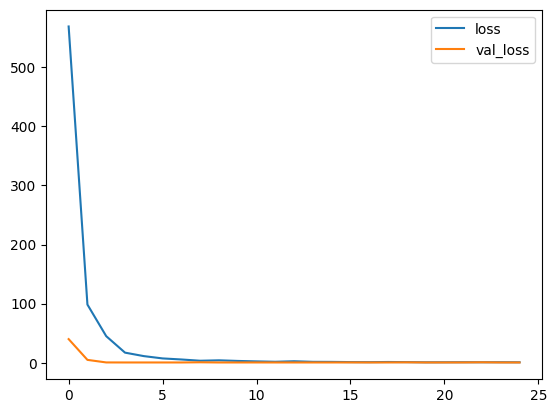

In [216]:
losses[['loss','val_loss']].plot()

Save Model and predict for new customer if you give credit or not

In [113]:
df.drop('')

In [114]:
df['loan_repaid']

0         0
1         0
2         0
3         0
4         1
         ..
216898    0
216899    0
216900    0
216901    0
216902    0
Name: loan_repaid, Length: 216450, dtype: int64

In [115]:
df.isnull().sum() / len(df) *100

loan_amnt               0.0
term                    0.0
int_rate                0.0
installment             0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
dti                     0.0
earliest_cr_line        0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
initial_list_status     0.0
application_type        0.0
mort_acc                0.0
pub_rec_bankruptcies    0.0
address                 0.0
loan_repaid             0.0
A2                      0.0
A3                      0.0
A4                      0.0
A5                      0.0
B1                      0.0
B2                      0.0
B3                      0.0
B4                      0.0
B5                      0.0
C1                      0.0
C2                      0.0
C3                      0.0
C4                  

In [ ]:
'10+ years'[:3]


In [ ]:
'1 year'[:3]

In [ ]:
data_info.columns